#**Contexte du projet**

Dans un contexte bancaire de plus en plus concurrentiel, la mise en place de campagnes marketing efficaces est essentielle pour maximiser la rentabilité et améliorer l'expérience client. Ce projet vise à utiliser des
analyses statistiques afin d'aider la banque à décider quels clients cibler pour souscrire à des dépôts à terme.

###**Objectifs du projet**
* Explorer et analyser les données pour extraire des insights stratégiques.
* Appliquer des méthodes statistiques avancées pour valider les résultats.
* Fournir des recommandations stratégiques basées sur les résultats obtenus.
* Prédire si un client acceptera (« yes ») ou refusera (« no ») une offre de dépôt à terme

# Description des données

Les données comprennent les informations démographiques des clients, leurs interactions passées avec la banque, et les résultats de campagnes marketing antérieures.

**Variables d'entrée**
1. *age* : âge du client (numérique).
2. *job* : type d'emploi (catégorique : « admin.», « unemployed », « management », etc.).
3. *marital* : statut matrimonial (catégorique : « married », « single », « divorced »).
4. *education* : niveau d'éducation (catégorique : « primary », « secondary », « tertiary »).
5. *default* : crédit en défaut ? (binaire : « yes », « no »).
6. *balance* : solde moyen annuel en euros (numérique).
7. *housing* : prêt immobilier ? (binaire : « yes », « no »).
8. *loan* : prêt personnel ? (binaire : « yes », « no »).
9. *contact* : type de communication lors du dernier contact (catégorique : « telephone », « cellular »).
10. *day* : jour du dernier contact (numérique).
11. *month* : mois du dernier contact (catégorique : « jan », « feb », etc.).
12. *duration* : durée du dernier contact en secondes (numérique).
13. *campaign* : nombre de contacts réalisés durant la campagne (numérique).
14. *pdays* : nombre de jours depuis le dernier contact dans une campagne précédente (numérique, -1 si
jamais contacté).
15. *previous* : nombre de contacts avant cette campagne (numérique).
16. *poutcome* : résultat de la campagne précédente (catégorique : « success », « failure », « unknown »).
17. *Variable cible* : y : le client a-t-il souscrit à un dépôt à terme ? (binaire : « yes », « no »).


# Méthodologie

Le projet adopte une démarche structurée selon la méthodologie CRISP-DM, articulée autour des étapes suivantes :

- Compréhension du contexte et des données
- Analyse des objectifs stratégiques de la banque.
- Exploration des données via des statistiques descriptives et des visualisations.
- Identification des segments de clients à cibler en priorité.
- Préparation des données
- Traitement des valeurs manquantes (imputation ou suppression selon les cas).
- Détection et gestion des valeurs aberrantes à l’aide de la méthode de Tukey.
- Suppression des variables non pertinentes après analyse.
-Encodage des variables catégorielles si nécessaire.
- Analyse statistique
- Analyse univariée : étude détaillée des distributions à l’aide de mesures statistiques (moyenne, médiane, écart-type) et de visualisations (histogrammes, boxplots).
- Analyse multivariée (clustering) : segmentation des clients, visualisation et interprétation des groupes formés.
- Modélisation
- Mise en œuvre d’un modèle simple (KNN) afin de prédire l’adhésion à une offre.

L’objectif n’est pas l’optimisation fine du modèle, mais l’analyse de ses résultats pour guider la prise de décision stratégique.

- Présentation des résultats et recommandations

- Restitution visuelle des résultats.

- Recommandations sur les profils clients à cibler.

- Proposition de scénarios alternatifs pour améliorer le retour sur investissement.
- (Bonus) Mise en production : développement d’un tableau de bord interactif avec Streamlit permettant de tester différentes hypothèses ou stratégies de ciblage.

# Analyse des données

Nous souhaitons utiliser le fichier dont les données sont les plus complètes. En visualisant bank.csv et bank-full.csv, nous remarquons que bank-full.csv contient 10 fois plus d'informations. C'est avec ces données que nous allons débuter notre analyse pour répondre aux objectifs demandés.

## Préparation des données

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# enlever les warning
import warnings
warnings.filterwarnings("ignore")

# lecture du fichier bank-full.csv
data_bank = pd.read_csv('bank-full.csv', sep=';') #on veille à bien mentionner le séparateur

# Affichage des dimensions du fichier
print('Dimension des données : ',data_bank.shape)

# Aperçu des données
print('Affichage des 5 premières lignes de bank-full :')
data_bank.head()


Dimension des données :  (45211, 17)
Affichage des 5 premières lignes de bank-full :


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
# Affichage des informations du fichier
data_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


## Nettoyage des données

In [4]:
# Data cleaning

# Vérifier s'il n'y a pas de valeurs manquantes
print('Valeurs manquantes:\n', data_bank.isnull().sum())

# Vérifier s'il n'y a pas de lignes dupliquées
print("\nNombre de lignes dupliquées", data_bank.duplicated().sum())

# Retirer les lignes dupliquées si existant
data_bank.drop_duplicates(inplace=True)

Valeurs manquantes:
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Nombre de lignes dupliquées 0


## Statistiques descriptives

In [5]:
# Statistiques descriptives
data_bank.describe() # que pour les variables numériques

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Ce tableau nous donne un premier aperçu de la distribution des données (pour les variables numériques)

Concernant l'âge, la moyenne est de 41 ans avec un intervalle interquartile (IQR) entre 33 (Q1) et 48 ans (Q3), ce qui montre une population de clients majoritairement en âge actif. L’âge maximal atteint 95 ans, ce qui est rare et potentiellement atypique.

Le solde annuel moyen est de 1362 €, mais la médiane est bien plus basse (448 €), ce qui indique une forte asymétrie à droite. La présence de valeurs extrêmes est confirmée par un maximum supérieur à 102 000 €, et même des soldes négatifs allant jusqu'à -8019 €.

La distribution du jour du mois du dernier contact semble uniforme entre le 1er et le 31e jour.

La durée moyenne des appels est de 258 secondes, une médiane de 180 secondes, mais on observe des appels très longs (jusqu’à 4918 secondes). Cette variable est très dispersée et fortement asymétrique.

La plupart des clients ont été contactés 1 à 3 fois (variable campaign), mais certains l’ont été jusqu’à 63 fois, ce qui est extrême. Cela pourrait biaiser les résultats

Pour pdays, *si le client a été contacté précédemment*, la valeur -1 est prédominante ( même valeur pour médiane, Q1 et Q3), signifiant qu'une majorité n’a jamais été recontactée avant cette campagne.

La majorité des clients (médiane à 0) n’ont jamais eu de contact précédent, mais certains ont été sollicités jusqu’à 275 fois, ce qui est très inhabituel.

In [6]:
# valeurs aberrantes en utilisant la méthode de Tukeys
print('\nValeurs aberrantes pour les variables numériques')
numerical_features = data_bank.select_dtypes(include=np.number).columns
for col in numerical_features:
    Q1 = data_bank[col].quantile(0.25)
    Q3 = data_bank[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
  # Compter le nombre de valeurs aberrantes pour chaque colonne
    outliers_count = ((data_bank[col] < lower_bound) | (data_bank[col] > upper_bound)).sum()
    print(f"Nombre de valeurs aberrantes pour la colonne {col} : {outliers_count}")




Valeurs aberrantes pour les variables numériques
Nombre de valeurs aberrantes pour la colonne age : 487
Nombre de valeurs aberrantes pour la colonne balance : 4729
Nombre de valeurs aberrantes pour la colonne day : 0
Nombre de valeurs aberrantes pour la colonne duration : 3235
Nombre de valeurs aberrantes pour la colonne campaign : 3064
Nombre de valeurs aberrantes pour la colonne pdays : 8257
Nombre de valeurs aberrantes pour la colonne previous : 8257


La *méthode de Tukeys* nous révèle une présence significative d’observations extrêmes (très visibles avec les box plots ci-dessous *Analyse univariée*):

Les variables **balance**, **pdays** et **previous** présentent le plus grand nombre d’outliers, avec plus de 8 000 cas pour les deux dernières, ce qui reflète une forte dispersion. Ces variables pourraient nécessiter un traitement spécifique comme une transformation logarithmique (appliquer la fonction log à la variable).

Les variables **duration** et **campaign** montrent également un nombre élevé d’outliers (plus de 3 000). Cela peut indiquer des appels très longs ou une sur-sollicitation de certains clients. Il faudra être prudent avec **duration**, car elle est hautement corrélée avec la cible.

La variable **age** comporte environ 487 valeurs extrêmes, ce qui reste acceptable compte tenu de la taille de l’échantillon (45 000+ clients). Il peut être judicieux de les conserver.

Enfin, **day** ne contient aucune valeur aberrante (ce qui est normale).

## Analyse univariée

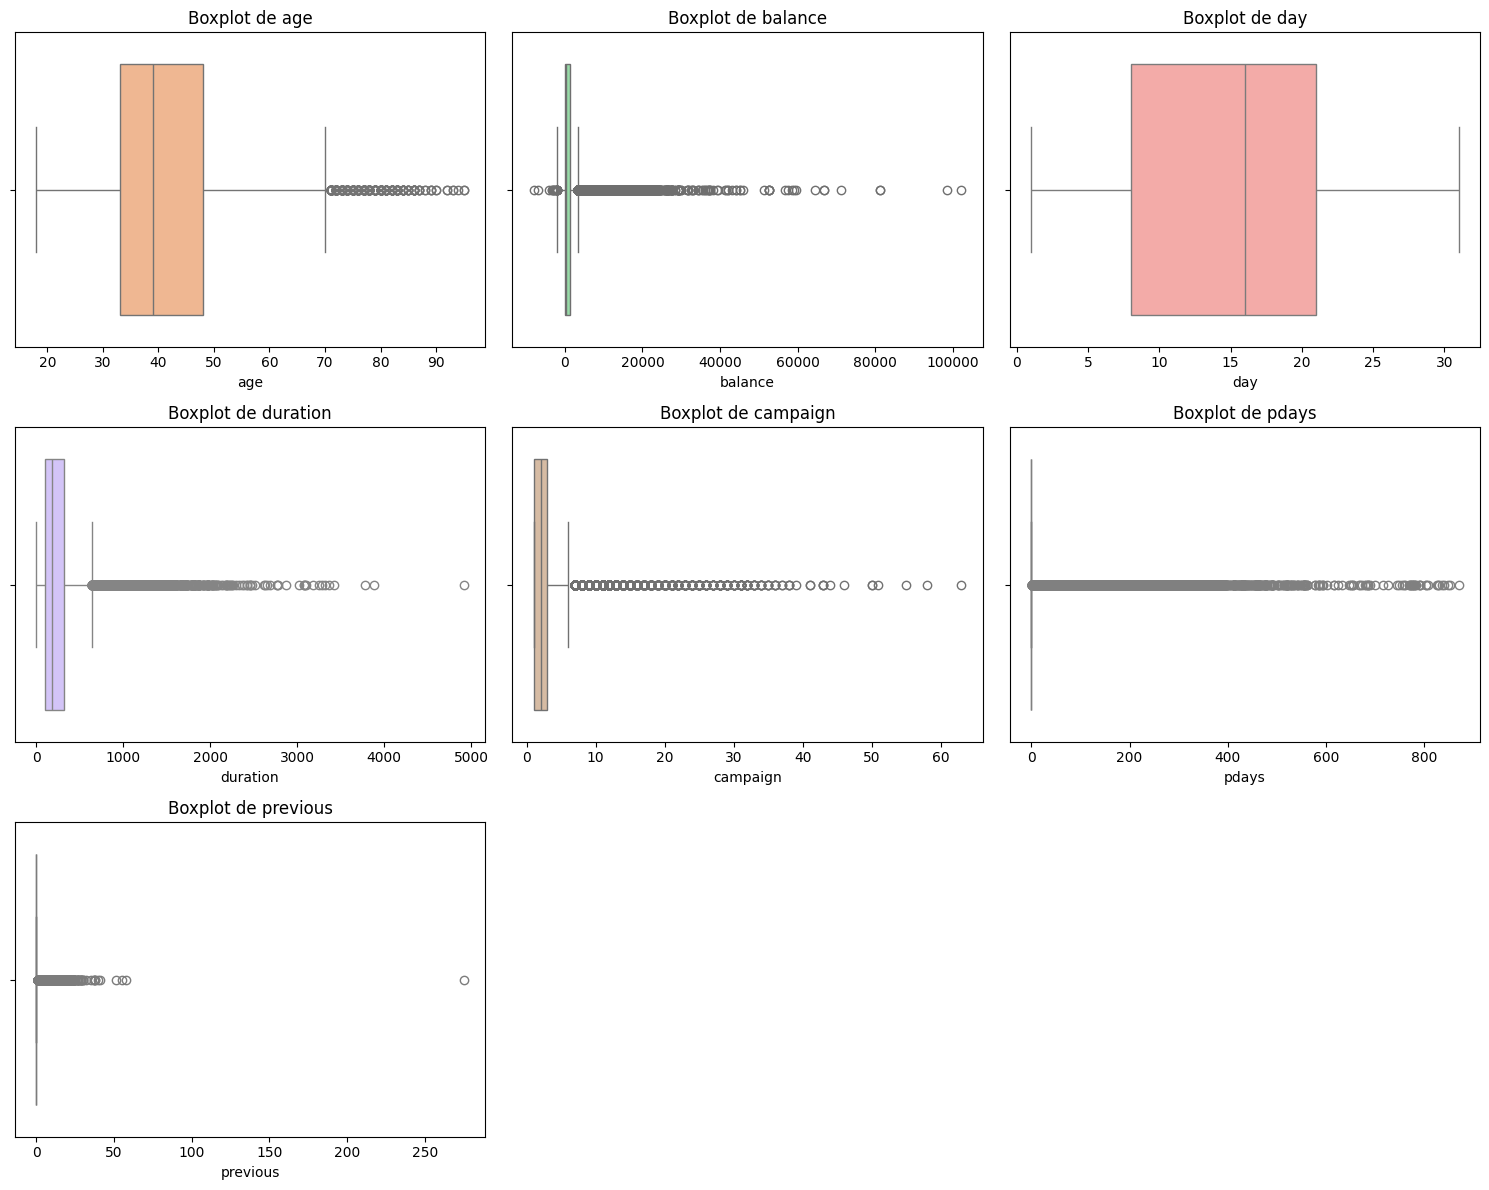

In [7]:
import math
#Visualisation variable numériques avec des boxplots
n_cols = 3  # nombre de colonnes dans la grille
n_rows = math.ceil(len(numerical_features) / n_cols)

plt.figure(figsize=(5 * n_cols, 4 * n_rows))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x=data_bank[col], color=sns.color_palette("pastel")[i % 10])
    plt.title(f'Boxplot de {col}')
    plt.xlabel(col)
plt.tight_layout()
plt.show()


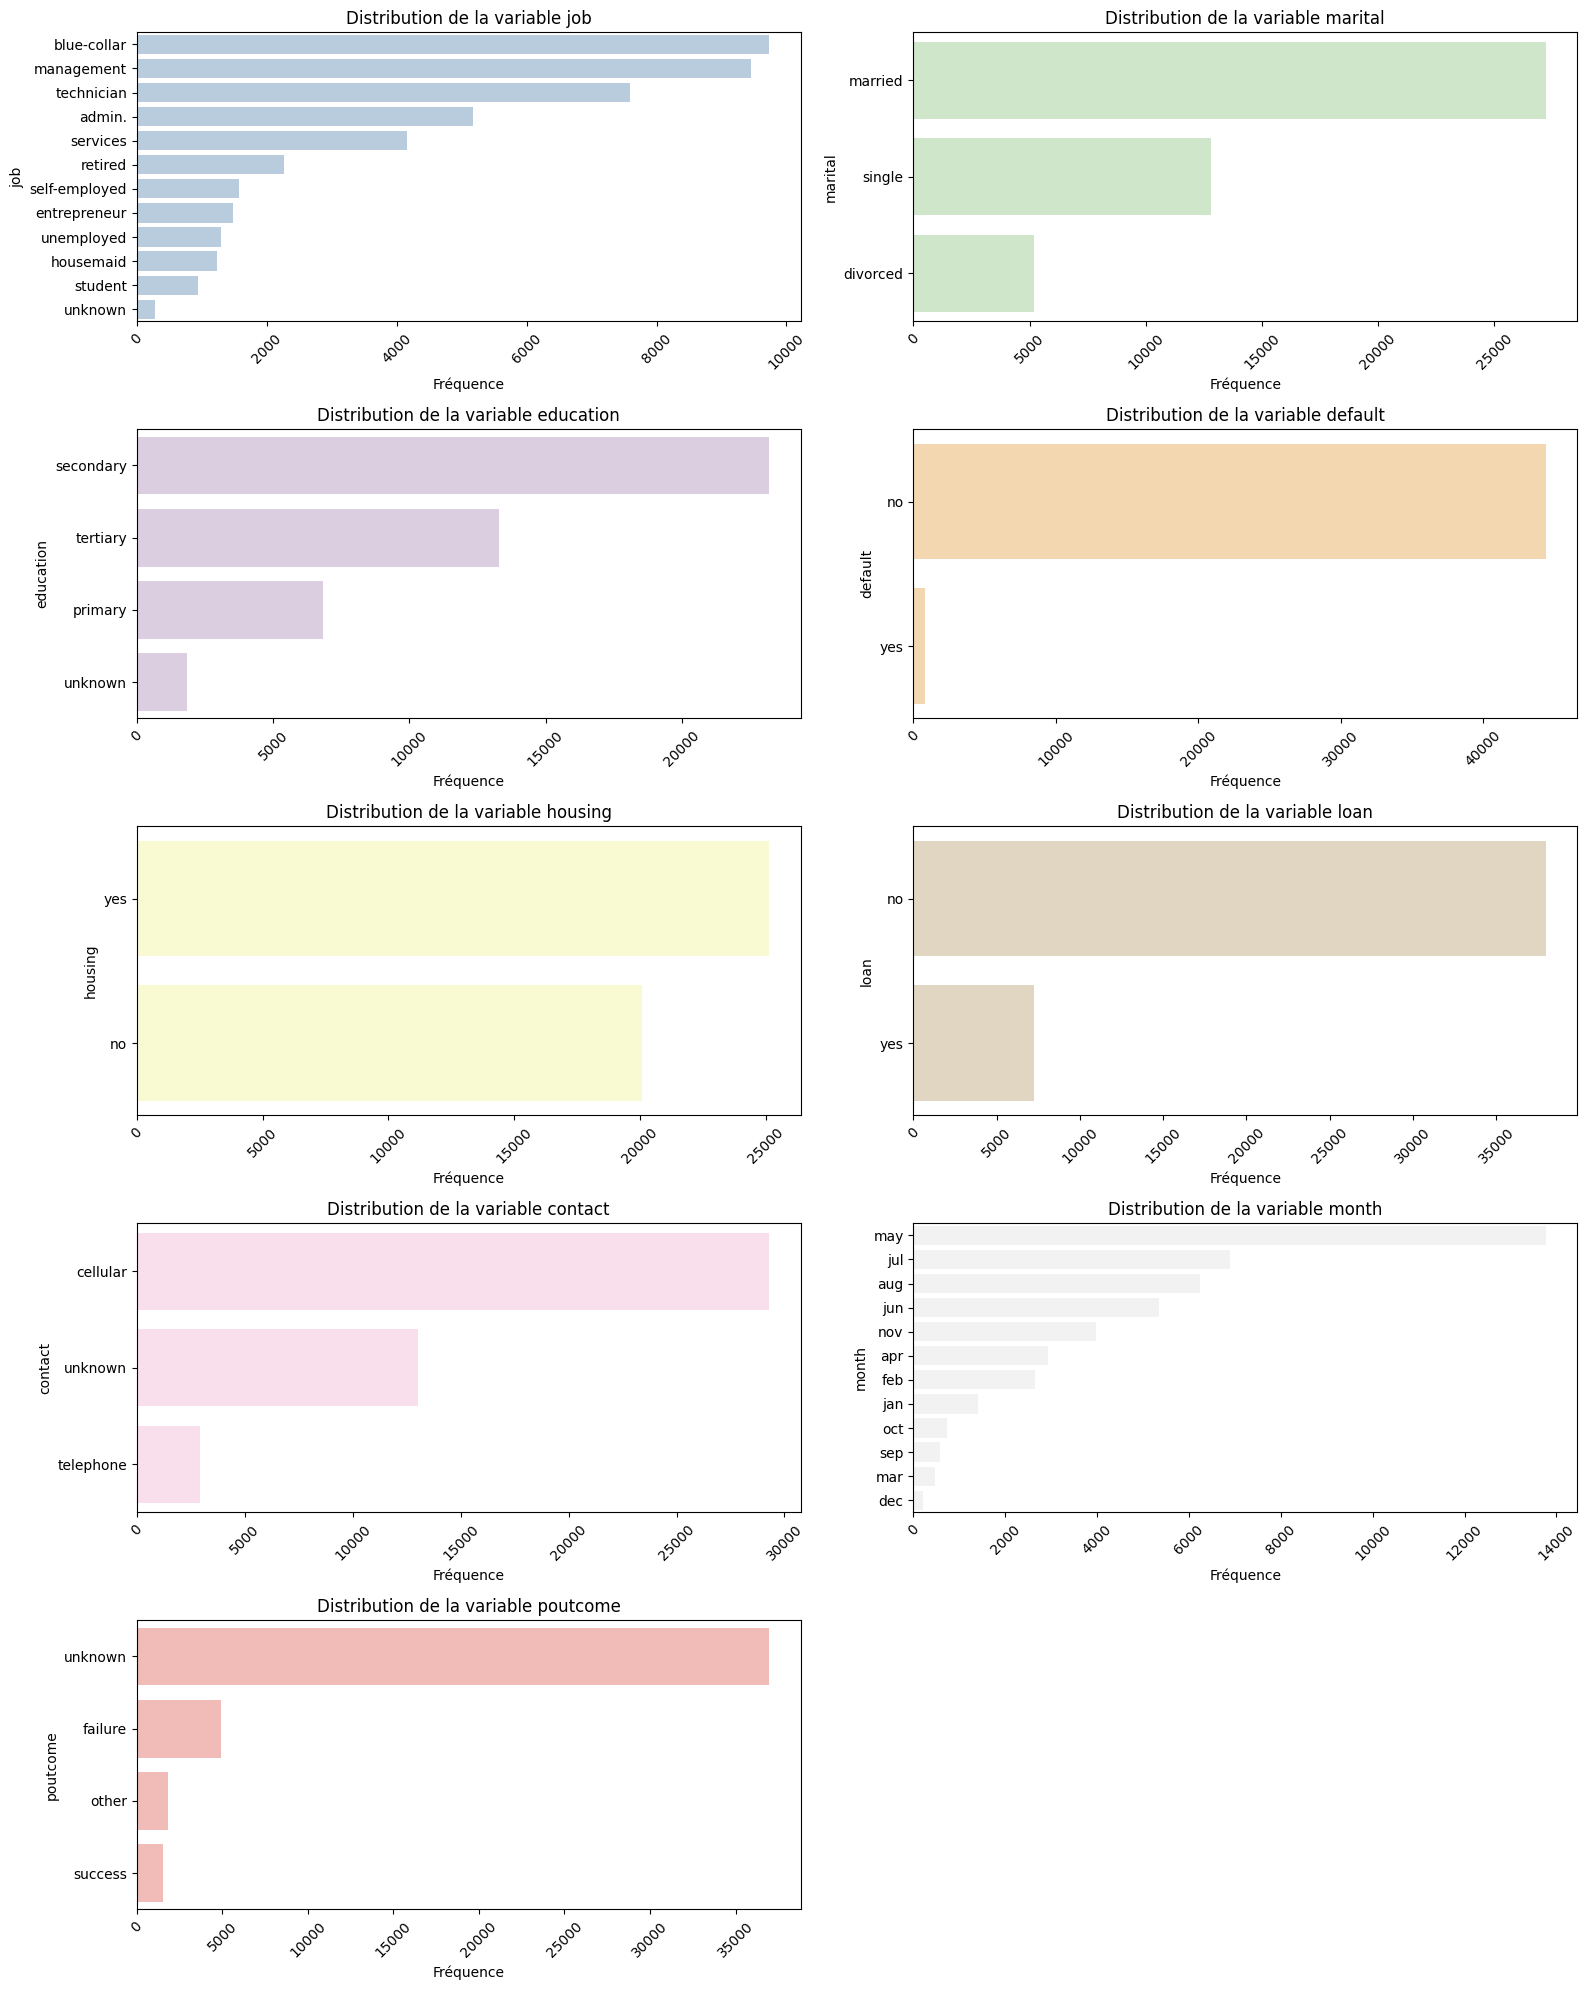

In [8]:
# Variables non numériques
cat_cols = data_bank.select_dtypes(include=['object']).columns
cat_cols = [col for col in cat_cols if col != 'y']
num_cats = len(cat_cols)
cols = 2
rows = (num_cats + 1) // cols

#variable pour la palette de couleur
palette = sns.color_palette("Pastel1")
plt.figure(figsize=(16, rows * 4))

#Boucle pour afficher les plot de chaque varibale non numérique
for i, col in enumerate(cat_cols, 1):
    plt.subplot(rows, cols, i)
    order = data_bank[col].value_counts().index
    sns.countplot(data=data_bank, y=col, order=order, color=palette[i % len(palette)])
    #sns.histplot(data_bank[col], kde=True, bins=30,  color=palette[i % len(palette)]) #je préfère celle du dessus en terme de visualisation
    plt.title(f'Distribution de la variable {col}')
    plt.xticks(rotation=45)
    plt.xlabel('Fréquence')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

Concernant les variables catégoriques, je n'ai pour l'instant pas encoder ces variables pour avoir une belle visualisation, facilement interprétable.

Tout d'abord, les métiers les plus courants sont blue-collar, management et technician. Les profils comme student ou retired, bien que rares, méritent tout de même une attention particulière pour leur potentiel de souscription.

Les clients sont majoritairement mariés. Le statut marital pourrait influencer la propension à souscrire.

La majorité des clients a un niveau d'éducation de type secondary ou tertiary.

Très peu de clients sont en défaut de crédit, ce qui limite l’influence de cette variable.

Les crédits immobiliers et personnels sont globalement équilibrés.

Le contact se fait surtout par téléphone portable, très peu via ligne fixe.

Les campagnes se concentrent sur mai, juillet, août et juin, des mois potentiellement plus efficaces.

Pour le poutcome, la majorité des résultats passés sont inconnus. Les échecs sont plus nombreux que les succès, mais cette variable reste intéressante pour cibler des profils réceptifs.

## Analyse bivariée

In [9]:
# Encodage des variables catégorielles (sauf 'y')
data_encoded = pd.get_dummies(data_bank.drop('y', axis=1), drop_first=True)

# Encodage de la variable cible
data_encoded['y'] = data_bank['y'].map({'no': 0, 'yes': 1})


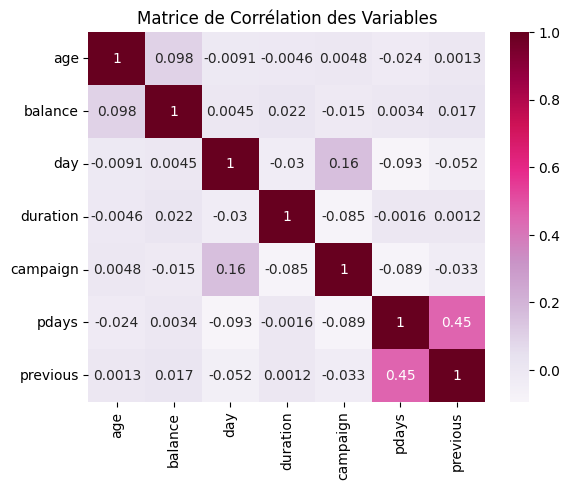

In [10]:
#Matrice de corrélation pour les numériques only
corr=data_bank.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="PuRd")
plt.title("Matrice de Corrélation des Variables")
plt.show()

In [11]:
import plotly.express as px

# Calcul de la matrice de corrélation avec les variables encodées (à ne pas prendre en compte à part point bonus ;))
corr_matrix = data_encoded.corr()

# Affichage interactif avec Plotly
fig = px.imshow(corr_matrix,
                text_auto=True,
                color_continuous_scale='PiYg',
                zmin=-1, zmax=1,
                aspect='auto',
                title="Matrice de corrélation interactive entre toutes les variables")
fig.update_layout(
    autosize=False,
    width=1300,
    height=900,
    margin=dict(l=100, r=100, t=100, b=100),
    font=dict(size=10)
)

fig.show()


Dans le cadre de l’analyse bivariée, nous avons encodé les variables catégorielles afin de calculer les corrélations entre toutes les variables, y compris la variable cible y.

Une première heatmap a été réalisée sur les variables numériques brutes (data_bank), puis une matrice complète (ci-dessus) et une autre centrée sur y (ci-dessous) ont été générées à l’aide de plotly pour une meilleure lisibilité.

Ces analyses permettent d’identifier les variables les plus influentes sur la souscription à l’offre, notamment duration, poutcome_success ou encore certains types de métiers

In [12]:
# Calcul de la corrélation
corr_matrix = data_encoded.corr().round(2)

# Tri des variables selon leur lien avec y
corr_y = corr_matrix[['y']].sort_values(by='y', ascending=False)

# Heatmap interactive centrée sur y
fig = px.imshow(corr_y,
                text_auto=True,
                color_continuous_scale='icefire',
                zmin=-1, zmax=1,
                aspect='auto',
                title="Corrélation entre les variables et la cible 'y'")

fig.update_layout(
    autosize=False,
    width=600,
    height=800,
    margin=dict(l=40, r=40, t=80, b=40),
    font=dict(size=10)
)

fig.show()

Le graphique ci-dessus présente les corrélations entre les différentes variables et la variable cible y (souscription à l’offre).

On observe que :

- duration est la variable la plus corrélée positivement avec y (+0.39). Plus un appel est long, plus le client a de chances d'accepter l’offre.

- poutcome_success (+0.31) indique qu’un succès à une campagne précédente est un excellent indicateur d’adhésion future.

D'autres variables comme certains mois (mars, octobre, septembre) montrent une légère corrélation positive.

À l’inverse, des modalités comme poutcome_unknown, contact_unknown, ou housing_yes sont négativement corrélées avec y, montrant qu’elles sont moins favorables à la souscription.

Ces corrélations, même si elles sont assez faibles globalement, permettent d’orienter les stratégies marketing vers les bons profils.

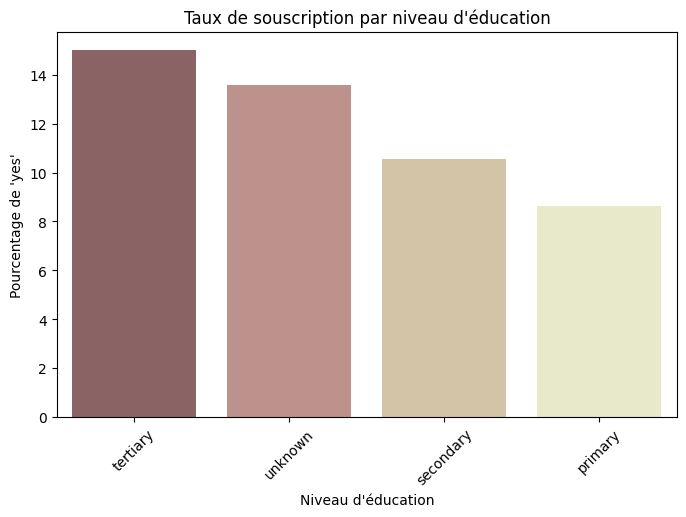

In [13]:
#Taux de souscription selon le niveau d'éducation
education_rate = pd.crosstab(data_bank['education'], data_bank['y'], normalize='index') * 100
education_rate = education_rate.sort_values(by='yes', ascending=False)

#Affichage du barplot
plt.figure(figsize=(8, 5))
sns.barplot(x=education_rate.index, y=education_rate['yes'], palette='pink')
plt.title("Taux de souscription par niveau d'éducation")
plt.ylabel("Pourcentage de 'yes'")
plt.xlabel("Niveau d'éducation")
plt.xticks(rotation=45)
plt.show()


Le graphe ci-dessus représente le taux de souscription à l’offre bancaire (y = yes) en fonction du niveau d’éducation des clients.

Nous pouvons voir que les clients ayant un niveau d'éducation tertiaire présentent le taux de souscription le plus élevé, environ à 15%, ce qui laisse penser qu'ils sont plus réceptifs aux offres financières.

Par ailleurs, nous observons que les clients ayant un niveau d'éducation inconnu représente environ 13% des clients qui ont répondu à l'offre de souscription. Cela laisse penser qu'il existe des profils particuliers.

Pour les clients ayant un niveau d'éducation de type secondaire et primaire, nous observons un taux de souscription à l'offre plus faible, respectivement de 11% et 9%, suggérant une moins grande appétence ou accessibilité à l’offre par rapport aux deux autres niveaux d'éducation

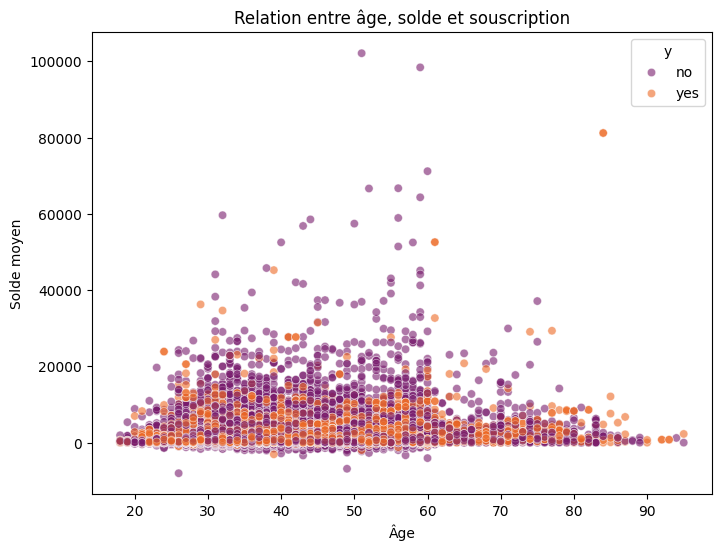

In [14]:
#Balance vs age
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data_bank, x='age', y='balance', hue='y', palette='inferno', alpha=0.6)
plt.title("Relation entre âge, solde et souscription")
plt.xlabel("Âge")
plt.ylabel("Solde moyen")
plt.show()

La représentation ci-dessus est un nuage de point montrant la relation entre l'âge, le solde (balance) et la souscription (y).

Nous observons que la majorité des clients se situe entre 20 et 60 ans avec des soldes moyens inférieurs à 20 000€.

Les clients ayant une "balance" de plus de 40 000€ restent faible et cela ne concerne pas une catégorie d'âge de clients. Nous pouvons voir des clients aussi bien jeune qu'âgé ayant un solde de plus de 40 000€.

Les clients ayant souscrit un dépôt à terme sont visibles dans toutes les tranches d'âge, mais ils restent plus dispersés chez les clients ayant un solde positif non négligeable.

Nous pouvons affirmer qu'il n’existe pas de corrélation forte apparente entre l’âge avec le solde et la souscription ; cependant, un solde très bas semble associé à un taux de souscription légèrement plus faible.

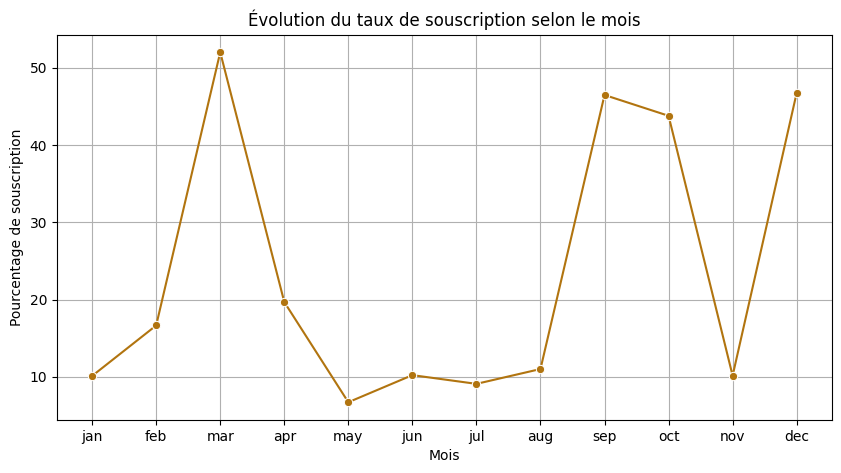

In [15]:
#taux de souscription par mois
#ordre des mois
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun',
               'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
#TCD entre mois et la variable cible y
month_rate = pd.crosstab(data_bank['month'], data_bank['y'], normalize='index') * 100 #normalisation + %
month_rate = month_rate.reindex(month_order) #stocker dans month_rate

#Visualisation du taux de souscription selon le mois
plt.figure(figsize=(10, 5))
sns.lineplot(data=month_rate, x=month_rate.index, y='yes', marker='o', color = '#B1740F')
plt.title("Évolution du taux de souscription selon le mois")
plt.ylabel("Pourcentage de souscription")
plt.xlabel("Mois")
plt.grid(True)
plt.show()


Voici le graphe d'analyse d'évolution du taux de souscription selon le mois.

Nous observons qu'il existe quelques pics durant l'année où le taux de souscription est elevé et des taux bas.

- Mars connaît le pic le plus élevé de souscription, dépassant 50%, ce qui en fait une période particulièrement stratégique pour lancer des campagnes marketing.

- Septembre, octobre et décembre montrent également des taux de souscription relativement élevés (entre 45% et 48%).

A l'inverse, les mois de mai, juillet et novembre enregistrent les taux les plus bas de souscription, souvent inférieurs à 10%. Les autres mois enregistrent des taux de souscriptions modérés autour de 10-20%.

Ainsi, ces résultats suggèrent que les campagnes marketing devraient être intensifiées autour de mars, septembre, octobre et décembre, tandis qu'une approche plus ciblée pourrait être envisagée pour les mois moins favorable.


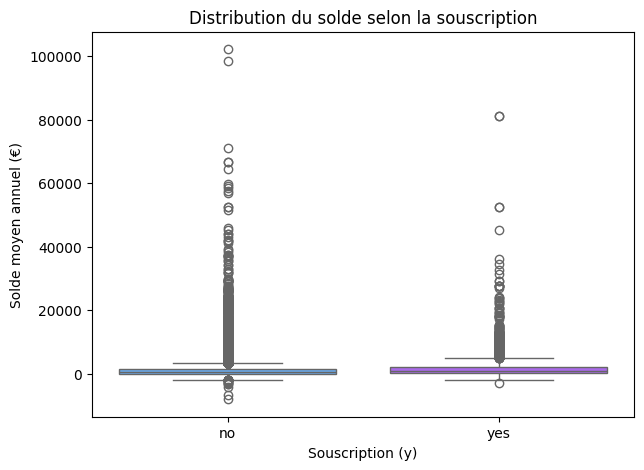

pour y = yes > Q1: 210.0, Q3: 2159.0, IQR: 1949.0, median : 733.0 Lower bound: -2713.5, Upper bound: 5082.5
pour y = no > Q1: 58.0, Q3: 1345.0, IQR: 1287.0,median : 417.0 Lower bound: -1872.5, Upper bound: 3275.5


In [16]:
#Distribution du solde selon la souscription
plt.figure(figsize=(7, 5))
sns.boxplot(data=data_bank, x='y', y='balance', palette='cool')
plt.title("Distribution du solde selon la souscription")
plt.xlabel("Souscription (y)")
plt.ylabel("Solde moyen annuel (€)")
plt.show()

#afficher min, max Q1 et Q3 pour balance et y = yes
Q1 = data_bank[data_bank['y'] == 'yes']['balance'].quantile(0.25)
median= data_bank[data_bank['y'] == 'yes']['balance'].median()
Q3 = data_bank[data_bank['y'] == 'yes']['balance'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR #méthode de Tukeys pour récupérer les valeurs max et min
upper_bound = Q3 + 1.5 * IQR
print(f"pour y = yes > Q1: {Q1}, Q3: {Q3}, IQR: {IQR}, median : {median} Lower bound: {lower_bound}, Upper bound: {upper_bound}")

#affihcer min, max Q1 et Q3 pour balance et y = no
Q1 = data_bank[data_bank['y'] == 'no']['balance'].quantile(0.25)
median= data_bank[data_bank['y'] == 'no']['balance'].median()
Q3 = data_bank[data_bank['y'] == 'no']['balance'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f"pour y = no > Q1: {Q1}, Q3: {Q3}, IQR: {IQR},median : {median} Lower bound: {lower_bound}, Upper bound: {upper_bound}")


Ci-dessus la distribution du solde selon la souscription, représentée par un boxplot.

- La majorité des soldes se situent entre -2714.5€ et 5082.5 pour y = yes, et entre -1872.5€ et 3275.5€ pour y = no.

- Les médianes du solde sont légèrement plus élevées pour les clients ayant souscrit (yes), ce qui pourrait indiquer qu'un solde positif plus élevé favorise légèrement la souscription.

- Nous observons également de nombreuses valeurs aberrantes (outliers), surtout concernant les soldes positives allant jusqu'à plus de 100 000€, mais ceci concerne une minorité de clients.

La forme aplatie et étalée des boxplots montre une grande variabilité du solde dans la population.

En résumé, le solde peut légèrement la décision de souscription, mais il faut qu'il soit combiné à d'autres variables pour améliorer la prédiction.

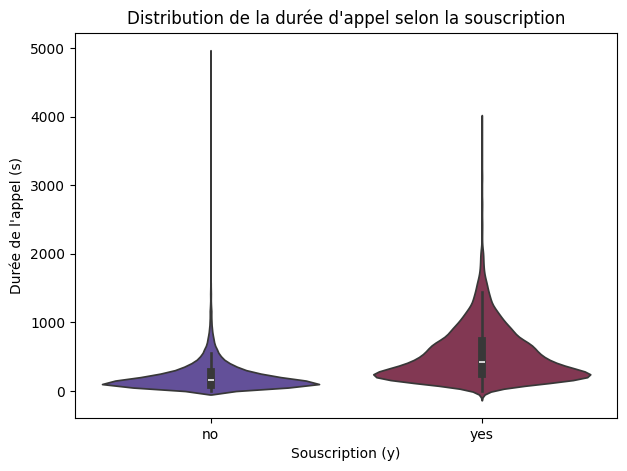

In [17]:
plt.figure(figsize=(7, 5))
sns.violinplot(data=data_bank, x='y', y='duration', palette='twilight')
plt.title("Distribution de la durée d'appel selon la souscription")
plt.xlabel("Souscription (y)")
plt.ylabel("Durée de l'appel (s)")
plt.show()


Le graphique ci-dessus présente la répartition de la durée des appels en fonction de la souscription à un dépôt à terme (violinplot).

Les clients ayant souscrit présentent en moyenne des appels beaucoup plus longs que ceux n’ayant pas souscrit.

Pour les clients ayant une souscription, la majorité des appels dure entre 200 et 800 secondes, avec une concentration autour de 300 secondes.

À l'inverse, pour les non-souscriptions, la durée d’appel est généralement plus courte, inférieure à 200 secondes pour la plupart.

Le profil de la distribution est également différent : les appels courts dominent largement pour les non-souscripteurs, tandis que les souscripteurs montrent une distribution plus étalée et orientée vers des appels longs.

Par ailleurs, nous pouvons observer des valeurs aberrantes pour les deux cas, mais restent moindres.

Cette représentation justifie le fait que la variable duration est corrélée à y.

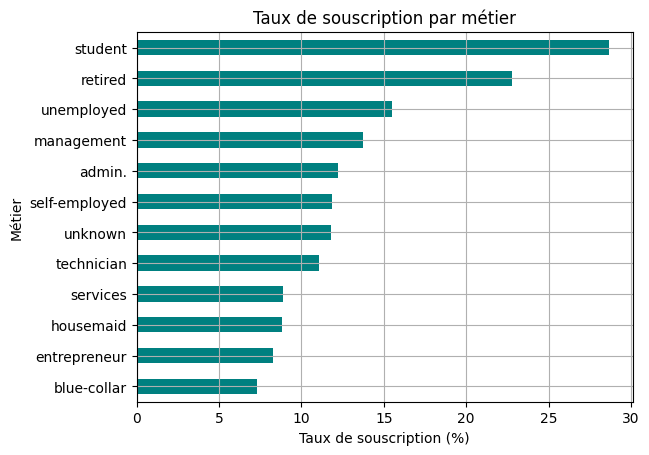

In [18]:
acceptance_by_job = data_bank.groupby('job')['y'].value_counts(normalize=True).unstack().fillna(0)['yes'] * 100
acceptance_by_job.sort_values().plot(kind='barh', color='teal')
plt.title("Taux de souscription par métier")
plt.xlabel("Taux de souscription (%)")
plt.ylabel("Métier")
plt.grid(True)
plt.show()


On observe que les étudiants, retraités et cadres sont plus enclins à souscrire.

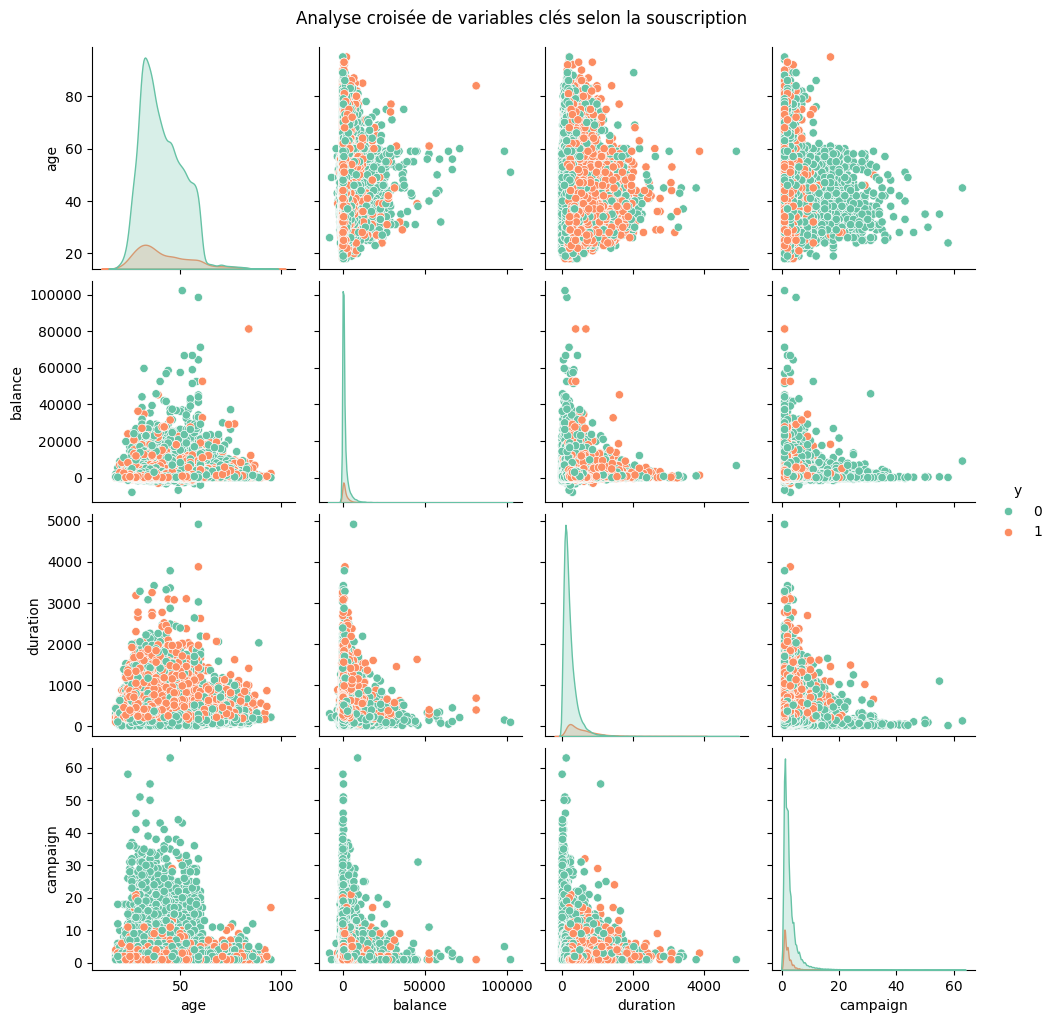

In [19]:
sns.pairplot(data_encoded[['age', 'balance', 'duration', 'campaign', 'y']],
             hue='y', palette='Set2', diag_kind='kde')
plt.suptitle("Analyse croisée de variables clés selon la souscription", y=1.02)
plt.show()


Pour ajouter davantage d'éléments de visualisations et d'analyse, nous avons opté pour un pairplot, qui permet de visualiser les relations croisées entre divers variables. Nous avons choisi les variables : duration, age, balance et campaign.

Tout d'abord, un code couleur existe : en rouge, les clients n'ayant pas souscript à un dépôt à terme, et en bleu, les clients qui ont souscrit à un dépôt à terme.

- duration est la variable la plus discriminante :

Les clients ayant souscrit (y = 1, en bleu) se concentrent majoritairement sur les longues durées d’appel. A l’inverse, les clients y = 0 sont presque tous dans les appels courts.

Cela confirme que plus un échange est long, plus le client est susceptible de dire oui.

- balance (solde bancaire):

Les clients avec un solde très élevé (> 20 000€) semblent plus nombreux parmi les souscripteurs.

Le solde peut être un indicateur de capacité financière, mais il ne suffit pas à lui seul.

- age, la majorité des clients se situent entre 25 et 60 ans.

Les deux classes (yes et no) sont très entremêlées. Il y a peu de pouvoir discriminant visuel.

L'âge est sans doute moins utile seul, mais peut aider en interaction avec d’autres variables.

- campaign ou nombre de contacts

Les clients contactés très souvent ont rarement souscrit (points rouges dominants pour campaign > 10).

Une campagne trop insistante semble contre-productive.

Ainsi, cette visualisation confirme que la variable duration est clé, suivie de balance et des interactions possibles avec campaign.

## Analyse multivariée

In [20]:
from sklearn.preprocessing import StandardScaler

# Sélection des variables à utiliser pour le clustering
X_cluster = data_encoded.drop(columns=['duration', 'y'])  # on enlève la cible et la variable trop corrélée

# Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)


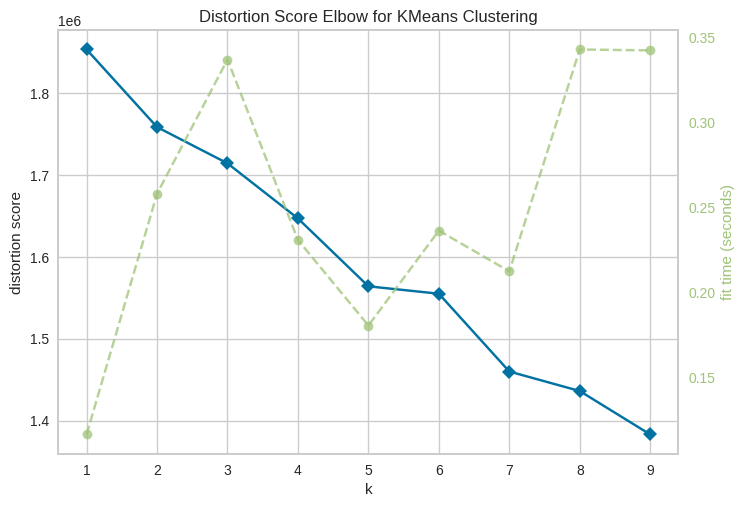

In [21]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1, 10))  #CHOISIR ENTRE 1,3,4.,,,10 cluster
visualizer.fit(X_scaled)
visualizer.show();


Pour l'analyse multivariée, nous allons partir sur la méthode du coude : méthode permettant de déterminer la valeur K optimale dans un algorithme de clustering Kmeans.

En observant le graphe ci-dessus, nous observons le coude à K = 3.

Nous avons également tester de manière manuelle avec le code ci-dessous et nous observons la même conclusion; k=3 pour le clustering avec KMeans.


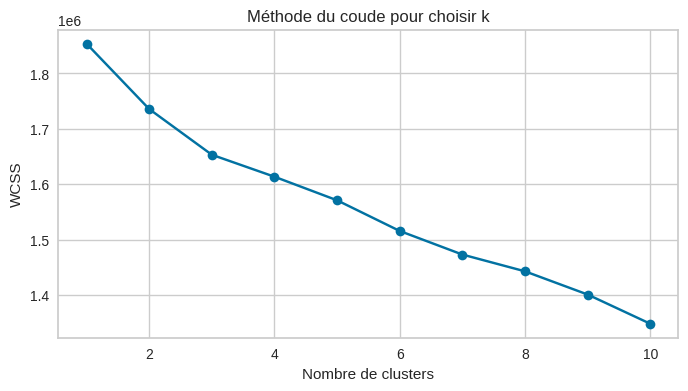

In [22]:
#méthode du coude
from sklearn.cluster import KMeans

inertia = []
K_range = range(1, 11)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K_range, inertia, marker='o')
plt.title("Méthode du coude pour choisir k")
plt.xlabel("Nombre de clusters")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()

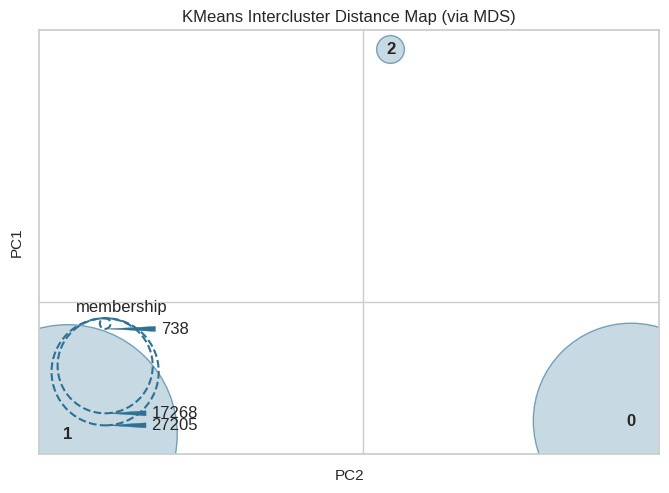

In [23]:
from yellowbrick.cluster import InterclusterDistance

# Instantiate the clustering model and visualizer
model = KMeans(3)  #avec 4 on a aussi parfois des clusters qui ne se croisent pas (pas tout le temps)
visualizer = InterclusterDistance(model)

visualizer.fit(X_scaled)
visualizer.show();

La visualisation des distances inter-clusters avec Yellowbrick permet d’évaluer le degré de séparation entre les groupes.

Une bonne séparation indique des clusters bien distincts, ce qui est important pour l’interprétation stratégique.

Avec k=3, nous observons une très bonne séparation des clusters, bien distincts

In [24]:
# Analyse de profil des clusters
kmeans = KMeans(n_clusters=3, random_state=42)
data_encoded['cluster'] = kmeans.fit_predict(X_scaled)

# Profil des clusters en affichant seulement quelques colonnes
cluster_profile = data_encoded.groupby('cluster')[['age', 'balance', 'campaign', 'pdays', 'previous', 'y']].mean().round(2)
display(cluster_profile)


,age,balance,campaign,pdays,previous,y
cluster,,,,,,
0,41.79,1459.92,3.09,-0.72,0.00,0.12
1,40.94,1551.40,2.06,225.91,3.19,0.23
2,39.82,1138.46,2.69,-0.99,0.00,0.06


Nous allons analyser le tableau ci-dessous contenant les caractéristiques des clusters.

-  Cluster 0 :
 - Âge moyen : 41,8 ans
 - Solde moyen : 1459 €
 - Nombre moyen de contacts dans la campagne : 3 appels
 - pdays: presque aucun recontact (-0,72 ≈ jamais contacté)
 - Contacts précédents (previous) : 0
 - Taux de souscription (y) : 12%

Ce cluster regroupe des clients d’âge moyen, avec un bon solde bancaire, mais relativement faiblement réactifs aux campagnes, faible taux de souscription.

- Cluster 1 :
  - Âge moyen : 40,9 ans
  - Solde moyen : 1551 €
  - Nombre moyen de contacts : 2 appels
  - pdays : 225 jours en moyenne → donc clients déjà sollicités par le passé.
  - Contacts précédents : 3,19
  - Taux de souscription (y) : 23%

Ce cluster est le plus intéressant, avec un taux de souscription deux fois plus élevé que Cluster 0 ou 2.

Ce sont des clients réactivés via plusieurs campagnes passées — et qui ont répondu positivement.

- Cluster 2 :

 - Âge moyen : 39,8 ans (plus jeune en moyenne)
 - Solde moyen : 1138 € (le plus faible)
 - Nombre moyen de contacts : 2,69 appels
 - pdays : aucune relance (pdays ≈ -1)
 - Contacts précédents : 0
 - Taux de souscription (y) : 6% (le plus faible)

Ce sont des clients plus jeunes, moins aisés, jamais sollicités auparavant, et peu réactifs aux offres.

Ainsi, le cluster 1 est clairement la cible prioritaire pour maximiser le taux de conversion.

Les clusters 0 et 2 nécessitent soit une approche différente (plus personnalisée), soit une priorisation secondaire.

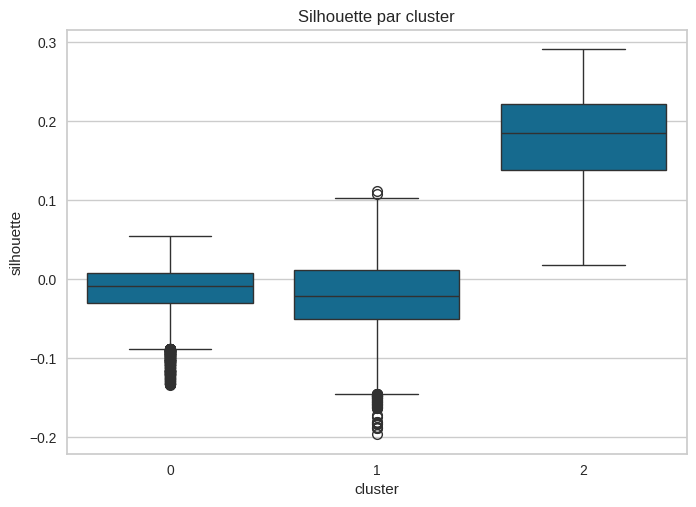

In [25]:
from sklearn.metrics import silhouette_samples

silhouette_vals = silhouette_samples(X_scaled, data_encoded['cluster'])
data_encoded['silhouette'] = silhouette_vals
sns.boxplot(x='cluster', y='silhouette', data=data_encoded)
plt.title("Silhouette par cluster")
plt.show()

L’analyse des scores de silhouette montre que le Cluster 2 est clairement le plus cohérent, avec une bonne densité  et une séparation nette des autres groupes.

En revanche, les Clusters 0 et 1 présentent des silhouettes faibles voire négatives, ce qui traduit un chevauchement entre ces groupes ou une segmentation moins précise.

Cela suggère que, bien que k=3 fournisse une structure exploitable, une optimisation des variables d’entrée ou un nombre de clusters légèrement différent pourrait potentiellement améliorer la qualité du regroupement.

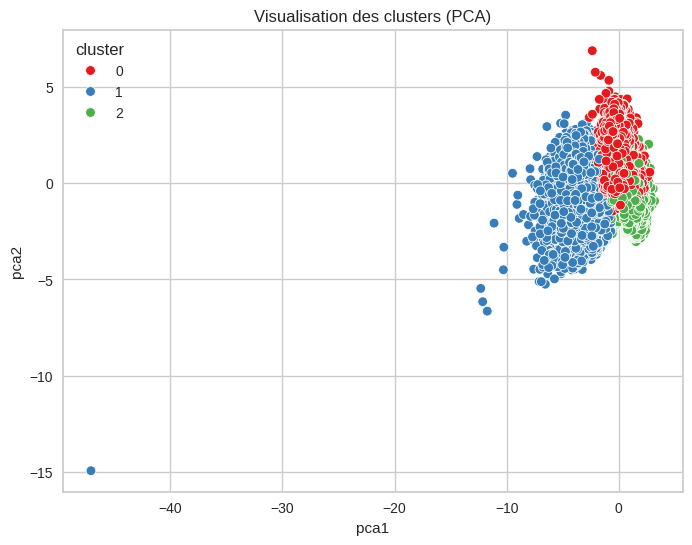

In [26]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(X_scaled)
data_encoded['pca1'] = pca_data[:, 0]
data_encoded['pca2'] = pca_data[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=data_encoded, x='pca1', y='pca2', hue='cluster', palette='Set1')
plt.title("Visualisation des clusters (PCA)")
plt.grid(True)
plt.show()


La séparation visuelle entre les groupes est plutôt bonne, surtout entre le Cluster 1 (bleu) et les deux autres.

Les Cluster 0 (rouge) et Cluster 2 (vert) semblent proches et un peu superposés, ce qui confirme que ces deux segments partagent certaines caractéristiques, comme vu précédemment.

Le Cluster 1 (bleu) forme un groupe bien distinct : cela confirme sa singularité, notamment observée dans le haut taux de souscription et les caractéristiques de contact passées.

Cette projection 2D permet donc de valider visuellement la pertinence de la segmentation, et de renforcer la décision d’axer la stratégie sur le Cluster 1 (clients réactivés, bien segmentés, plus enclins à souscrire).

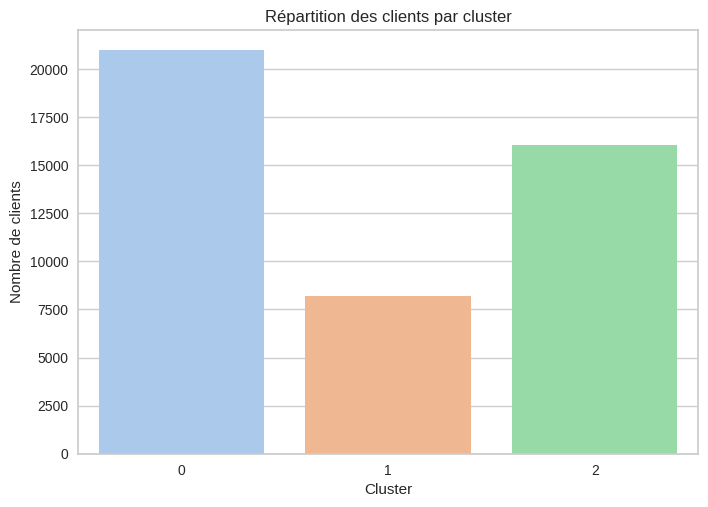

In [27]:
sns.countplot(data=data_encoded, x='cluster', palette='pastel')
plt.title("Répartition des clients par cluster")
plt.xlabel("Cluster")
plt.ylabel("Nombre de clients")
plt.show()


Ce graphique à barres présente la distribution du nombre de clients dans chacun des trois clusters identifiés par KMeans.

Nous observons que :

 - le Cluster 0 est le plus représenté, avec environ 21 000 clients. Il regroupe donc une part importante de la clientèle, mais on a vu qu’il présente un taux de souscription modéré d'environ de 12%.

 - le Cluster 2 compte environ 16 000 clients. C’est un segment intermédiaire en volume, mais le moins réactif à l’offre car il y a seulement 6% de taux de souscription.

 - le Cluster 1 est le plus réduit, avec environ 8 000 clients, mais c’est celui qui a le taux de souscription le plus élevé avec environ 23% de taux de souscription.

Même si le Cluster 1 est le plus petit, il représente un fort potentiel de conversion, ce qui en fait un cible stratégique prioritaire.

Le Cluster 0, bien que plus nombreux, montre une efficacité moyenne et peut faire l’objet d’une stratégie complémentaire ou de nurturing.

Le Cluster 2, peu réactif, doit faire l’objet d’un ciblage plus sélectif, voire être exclu des campagnes intensives pour optimiser les coûts.

# Modélisation

Après avoir analysé les différentes données et délimité les clusters, nous allons passer à la modélisation de données en utilisé le KNN.

Le KNN, ou K-Nearest Neighbors est un classificateur d'apprentissage non supervisée qui s'appuie sur la notion de proximité pour réaliser des classifications ou des prédictions sur le regroupement d'un point de données.

L'objectif est de prédire si un client va souscrire à partir des caractéristiques vues précédemment, à l'aide du modèle de KNN.

## Préparation des données

In [28]:
from sklearn.model_selection import train_test_split

# Séparer les variables explicatives et la cible
X = data_encoded.drop(columns=['y', 'cluster', 'pca1', 'pca2'])  # on retire la cible et les colonnes créées pour le clustering
y = data_encoded['y']

# Split des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
#concernant la ligne du dessus, le test-size à 0.3 signifie que 30%
#des données doivent être allouées à l'ensemble des test et les 70% à
#l'entrainement
#Pour random state à 42, cela garantit que les données sont divisées de la même
#manière à chaque exécution.

## Standardisation

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) #standardisation du test


## Modélisation

Dans le cadre de ce projet, nous souhaitons prédire si un client va souscrire à une offre ou non. Nous allons donc utiliser la méthode KNeighborsClassifier. Pour choisir le meilleur K, on va les tester et les afficher dans un graphe

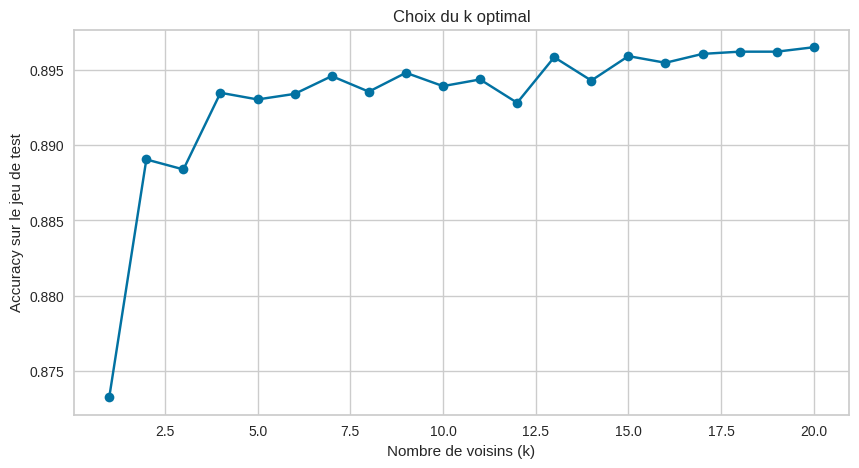

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Liste des accuracies
accuracies = []

# Tester k de 1 à 20
k_range = range(1, 21)

#Cette boucle va nous permettre de visualiser et de choisir
#la meilleuere valeur de k
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k) #Algo KNN
    knn.fit(X_train_scaled, y_train)#entrainement
    y_pred_k = knn.predict(X_test_scaled)#prediction
    acc = accuracy_score(y_test, y_pred_k)#taux de précision
    accuracies.append(acc)

# Affichage
plt.figure(figsize=(10, 5))
plt.plot(k_range, accuracies, marker='o')
plt.title("Choix du k optimal")
plt.xlabel("Nombre de voisins (k)")
plt.ylabel("Accuracy sur le jeu de test")
plt.grid(True)
plt.show()


Pour choisir le meilleur K, c'est celui où la performance est maximale sans surajuster, généralement autour du premier plateau stable.

Le graphe nous affiche les valeurs de k ainsi que les accuracy sur le jeu de test en fonction de k.

L’analyse de la courbe d’accuracy en fonction de k montre une stabilisation à partir de k = 7. Le meilleur compromis est atteint à k = 13, qui offre une accuracy maximale (~0.896) sans surapprentissage.

In [31]:
# Modèle KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#création modele
knn_model = KNeighborsClassifier(n_neighbors=13)
knn_model.fit(X_train_scaled, y_train) #entrainement modele

# Prédiction
y_pred = knn_model.predict(X_test_scaled)

## Evaluation du modèle

Accuracy : 0.8958271896195813

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94     11977
           1       0.63      0.27      0.37      1587

    accuracy                           0.90     13564
   macro avg       0.77      0.62      0.66     13564
weighted avg       0.88      0.90      0.88     13564



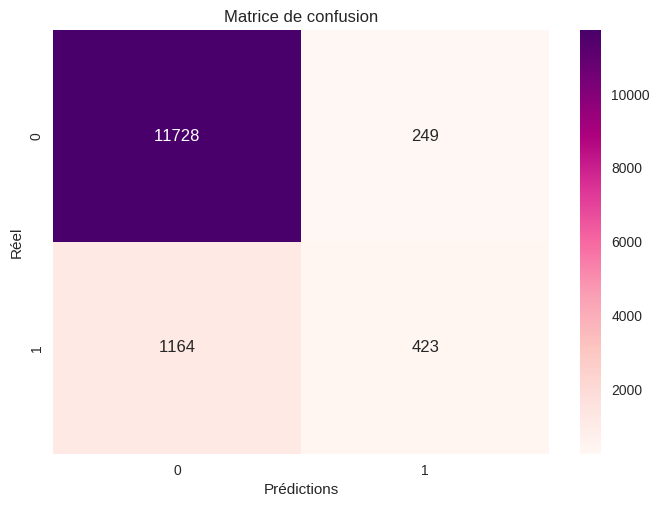

In [32]:
print("Accuracy :", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Matrice de confusion
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='RdPu')
plt.title("Matrice de confusion")
plt.xlabel("Prédictions")
plt.ylabel("Réel")
plt.show()


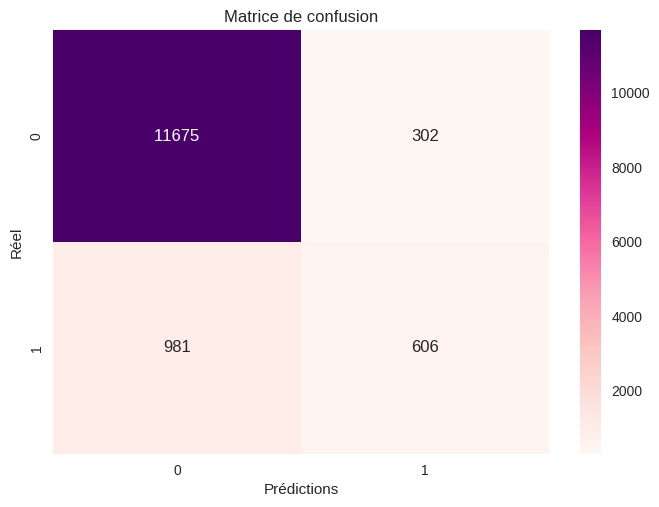

Accuracy : 0.9054113830728399

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95     11977
           1       0.67      0.38      0.49      1587

    accuracy                           0.91     13564
   macro avg       0.79      0.68      0.72     13564
weighted avg       0.89      0.91      0.89     13564



In [38]:
#RandomForest
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

#Matrice
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='RdPu')
plt.title("Matrice de confusion")
plt.xlabel("Prédictions")
plt.ylabel("Réel")
plt.show()

print("Accuracy :", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

Le modèle KNN permet une bonne distinction entre clients susceptibles ou non de souscrire à une offre, ce qui est précieux pour la stratégie de ciblage.

Cependant, pour une mise en production réelle, des modèles plus robustes pourraient être envisagés selon nous. Random Forest offrirait une meilleure stabilité et gèrerait mieux les données aberrantes, tandis que XGBoost permettrait d’obtenir des performances optimales grâce à son efficacité sur des jeux de données plus complexes.
Enfin, Naive Bayes serait une alternative intéressante pour des projets simples ou très rapides, bien qu’il soit moins adapté lorsque les variables sont fortement corrélées (mais bien pour tester tout de même).

En résumé, KNN est un excellent choix pour l’exploration initiale, mais pas pour un plus grand jeu de données de notre point de vue.

# Tableau de bord intéractif

In [39]:
#uniquement les 5 colonnes dont j'ai besoin
features = ['age', 'balance', 'campaign', 'pdays', 'previous']
X_app = data_encoded[features]
y_app = data_encoded['y']

# Standardisation
scaler_app = StandardScaler()
X_app_scaled = scaler_app.fit_transform(X_app)

# Ré entrainement avec les 5 colonnes uniquement
from sklearn.neighbors import KNeighborsClassifier
knn_app = KNeighborsClassifier(n_neighbors=13)
knn_app.fit(X_app_scaled, y_app)

# Sauvegarde du scaler et du modele
import pickle
with open('knn_model_app.pkl', 'wb') as f:
    pickle.dump(knn_app, f)

with open('scaler_app.pkl', 'wb') as f:
    pickle.dump(scaler_app, f)


In [34]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 76.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 105.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.1 MB/s eta 0:00:00


Pour la simulation ci-dessous, j'ai opté d'intégrer cinq variables qui étaient corrélées avec y, en utilisant le modèle KNN.

Pour avoir une prédiction positive c'est à dire que le client est susceptible de souscrire à l'offre, choississez :

- age = 44
- solde annuel moyen = 10 000
- Nombre de contact durant la campagne = 4
- Jour depuis la dernière campagne = 586
- Nombre de contacts précédents = 1

In [ ]:
!streamlit run simulation_offre.py




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.105.7.231:8501



# Stratégie du projet

### A. Recommandations stratégiques sur les segments de clients à cibler

Sur la base de l'analyse multivariée (clustering) et des résultats du modèle KNN, nous pouvons en conclure que :

- le segment prioritaire est le cluster 1, qui regroupe des clients ayant déjà été sollicités par le passé (avec un pdays élevé, plusieurs previous contacts) et qui affiche un taux de souscription élevé, d'environ ~23%.

### B. Action marketing recommandée :

Nous proposons :
- une mise en place de campagnes de relance ciblée par téléphone portable et emails personnalisés.
- une mise en avant d'offres exclusives ou d'avantages fidélité pour entretenir leur engagement.

### C. Approches secondaires :

Les approches secondaires seront faites pour les deux autres clusters
- Cluster 0 : communication plus douce, contenus pédagogiques sur les avantages des dépôts à terme.
- Cluster 2 : utiliser une stratégie pour alimenter une relation avec un prospect afin de l'accompagner tout au long de son processus d'achat, à plus long terme ou rediriger vers d’autres produits.

### D. Proposition de scénarios alternatifs pour maximiser le retour sur investissement.

|Scénario|	Stratégie|
|---    |---   |
|Priorité au Cluster 1|Maximiser le taux de souscription avec un coût maîtrisé.|
|Approche ciblée Cluster 0|Relance uniquement des sous-segments réactifs (ex: solde > moyenne).|
|Minimiser efforts sur Cluster 2|Réduire dépenses inutiles sur clients peu réactifs.|
|Test A/B|Tester différents messages marketing sur Cluster 1 et Cluster 0 pour maximiser l’impact.|

# Questions professionnelles orientées prise de décision
**1. Quels segments de clients montrent la plus grande propension à souscrire à l’offre, et quels types d’actions marketing recommanderiez-vous pour les cibler efficacement ?**

À partir de nos analyses multivariées, le Cluster 1 émerge comme le segment présentant la plus forte probabilité de souscription.

Ces clients se distinguent par leur historique d'interactions et une réceptivité marquée aux sollicitations passées.

*Actions recommandées :*

- Relances personnalisées par téléphone et email pour maintenir l'engagement.
- Offres promotionnelles ciblées, telles que des taux d’intérêt bonifiés ou des primes de fidélité à la souscription.
- Optimisation du temps de contact, en favorisant des échanges plus longs et qualitatifs (puisque la durée d'appel est positivement corrélée à la souscription).
- Segmentation comportementale dynamique : adapter le message selon la fréquence et la qualité des interactions passées.

Ces actions permettent de pouvoir les cibler efficacement et de pouvoir garder le client.

**2. En cas de contraintes budgétaires, quels critères utiliseriez-vous pour prioriser les segments à cibler ?**

En situation de contraintes budgétaires, il est essentiel d'optimiser le ciblage en fonction de :

- Probabilité de souscription élevée (par exemple : clients du Cluster 1 ayant plusieurs contacts antérieurs et un historique positif).
- Solde bancaire positif et supérieur à la médiane (indicateur de capacité d’investissement).
- Réactivité historique mesurée via previous et pdays.
- Coût d’acquisition estimé : privilégier les segments au meilleur ratio coût / probabilité de conversion.

*Approche recommandée :*

Prioriser les actions sur les profils à fort potentiel tout en minimisant les dépenses sur les profils peu réactifs.

**3. Comment équilibrer le coût d’une campagne marketing avec les opportunités manquées liées aux faux négatifs ?**

Pour maximiser l'impact tout en minimisant les pertes :

- Accepter un certain niveau de faux positifs (contact de clients non intéressés) pour réduire les faux négatifs (clients intéressés non contactés).
- Ajuster le seuil de décision du modèle KNN pour augmenter le rappel (par exemple en abaissant le seuil de 0,1).
- Segmenter les campagnes : réserver des offres plus "légères" (ex : email marketing) pour les profils incertains afin de limiter les coûts d'approche.

Il vaut mieux solliciter un client en trop que perdre un client prêt à souscrire !

**4. Quels indicateurs clés de performance (KPI) recommanderiez-vous de suivre pour évaluer le succès de la campagne ?**

Pour piloter la campagne efficacement, les KPI suivants sont essentiels :

- Taux de souscription : part des clients contactés ayant accepté l'offre.
- Coût par souscription acquise : indicateur clé d'efficacité économique.
- Taux de rappel (Recall) : capacité à détecter les vrais clients intéressés.
- Taux d'engagement : mesure de l'interaction client (réponse, durée d'appel).
- Retour sur Investissement (ROI) : rapport entre revenu généré et budget dépensé.
- Taux de faux négatifs : indicateur stratégique pour ajuster la politique de relance.
- Suivi par cluster pour affiner la stratégie d'évaluation du succès de campagne.

**5. Comment pourriez-vous intégrer des scénarios économiques (taux d’intérêt, inflation) dans votre modèle pour anticiper les résultats futurs ?**

Pour rendre le modèle plus robuste face aux variations économiques :

- Enrichir le dataset en intégrant des variables macroéconomiques comme :
 - Le taux d'inflation
 - Des indicateurs de confiance des consommateurs
- Réaliser des simulations pour anticiper l’impact de variations de taux sur la propension à souscrire.
- Analyse de sensibilité : évaluer l’élasticité de la souscription à l'évolution des taux (pour voir si c'est liée à l'impact de souscription au dépôt à terme)
- Scénarios prospectifs : bâtir plusieurs stratégies adaptées aux contextes économiques possibles (par exemple : baisse des taux, hausse de l'inflation, contexte de guerre etc...).




# Conclusion générale

Dans un contexte bancaire de plus en plus concurrentiel, ce projet a permis de démontrer comment la data science et les techniques analytiques avancées peuvent soutenir une prise de décision stratégique éclairée.

À travers une méthodologie rigoureuse basée sur CRISP-DM, nous avons :

- Exploré et nettoyé les données clients pour en extraire des insights fiables,
- identifié les facteurs clés influençant la souscription aux dépôts à terme,
- segmenté efficacement la clientèle grâce à l'algorithme KMeans,
- mis en place un modèle prédictif (KNN) pour prédire la propension à souscrire,
- et proposé des scénarios stratégiques adaptés aux contraintes économiques et budgétaires.

Nos analyses révèlent que :

- le cluster 1 constitue la cible prioritaire, présentant le meilleur potentiel de conversion.
- une campagne marketing personnalisée, basée sur des offres attractives et des relances ciblées, permettrait d'optimiser le retour sur investissement.
- l'intégration de variables économiques et la réalisation d'analyses de sensibilité garantiront une meilleure anticipation des changements de comportement des clients face aux évolutions du marché.

Enfin, ce projet illustre que l'approche data-driven, en conjuguant rigueur statistique et vision métier, permet de mieux comprendre les clients, d'optimiser les stratégies marketing et de renforcer la compétitivité de la banque.